In [43]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

from sklearn import cluster, datasets

from mpl_toolkits.mplot3d import Axes3D

# Importo

In [2]:
tabla = pd.read_csv('../csv/csv_limpios/tabla_completa_lp.csv', index_col=0)

In [3]:
liga = pd.read_csv('../csv/csv_limpios/laliga_lp.csv', index_col=0)

In [4]:
serieA = pd.read_csv('../csv/csv_limpios/serie_lp.csv', index_col=0)

In [5]:
premier = pd.read_csv('../csv/csv_limpios/premier_lp.csv', index_col=0)

# Analisis Estadistico

In [6]:
# Caluculo cuantos datos son el 20% de la tabla
int(len(tabla)*0.2)

647

In [7]:
# De la tabla, se cumple que el 20% de los valores de mercado representan el 80% de la capitalización de mercado

tabla['Valor de mercado'].sort_values(ascending=False)[:int(len(tabla)*0.2)].sum()

# Esto representa el valor de mercado del 20% de los jugadores mas caros

19436000000.0

In [8]:
# Comparamos contra el valor de mercado total
tabla['Valor de mercado'].sort_values(ascending=False)[:int(len(tabla)*0.2)].sum() / tabla['Valor de mercado'].sum()

0.76332505114918

In [9]:
# Podemos ver que el principio de Pareto no se cumple para el valor de mercado de los jugadores de las tres ligas estudiadas

In [10]:
# Hago una funcion que me calcule el principio de Pareto para cualquier liga
def pareto(liga):
    tabla_liga = tabla[tabla['Equipo'].isin(liga['Equipo'].unique())]
    return tabla_liga['Valor de mercado'].sort_values(ascending=False)[:int(len(tabla_liga)*0.2)].sum() / tabla_liga['Valor de mercado'].sum()

In [11]:
pareto(serieA), pareto(premier), pareto(liga)

(0.7738499766384913, 0.6816254219452862, 0.7772841186439569)

In [12]:
#convierto a dataframe mis resultados
pareto_valor = pd.DataFrame({'Liga': ['Serie A', 'Premier', 'La Liga'], 'Pareto': [pareto(serieA), pareto(premier), pareto(liga)]})


In [13]:
pareto_valor

,Liga,Pareto
0,Serie A,0.773850
1,Premier,0.681625
2,La Liga,0.777284


In [14]:
# Podemos ver que el principio de Pareto no se cumple para ninguna de las ligas, aunque en la serie A y en la Liga se acerca bastante


In [15]:
tabla['Pais'].value_counts()

ESP    657
ITA    467
ENG    327
FRA    128
ARG    126
      ... 
UZB      1
GLP      1
IRQ      1
LBY      1
CHN      1
Name: Pais, Length: 115, dtype: int64

In [16]:
# Hacemos pareto pero para los paises de la tabla. Viendo si con Inglaterra, España e Italia se cumple el principio de Pareto

pareto(tabla[tabla['Pais'] == 'ENG']), pareto(tabla[tabla['Pais'] == 'ESP']), pareto(tabla[tabla['Pais'] == 'ITA'])


(0.6947688987163619, 0.7525864992046842, 0.7738595642697846)

In [17]:
#Vemos que nuevamente no se cumple el principio de Pareto para ninguno de los paises, pero si se acerca.
# Esto demouestra que a la hora de ver el valor de mercado de los jugadores, vamos a encontrar outliers ya que existen paisees
# que tienen pocos jugadores con un valor de mercado muy alto, y otros que tienen muchos jugadores con un valor de mercado bajo

In [18]:
# Convierto mis resultados en un dataframe para poder visualizarlos mejor

pareto_paises = pd.DataFrame({'Pais': ['ENG', 'ESP', 'ITA'], 'Pareto': [pareto(tabla[tabla['Pais'] == 'ENG']), pareto(tabla[tabla['Pais'] == 'ESP']), pareto(tabla[tabla['Pais'] == 'ITA'])]})



In [19]:
pareto_paises

,Pais,Pareto
0,ENG,0.694769
1,ESP,0.752586
2,ITA,0.773860


# Clustering para equipos de diferente tamano


In [20]:
#Hago clustering para agrupar equipos por la media de valor de mercado de sus jugadores

# Primero hago un dataframe con los equipos y la media de valor de mercado de sus jugadores

equipos_media = tabla.groupby('Equipo')['Valor de mercado'].mean().reset_index()

In [44]:
equipos_media['cluster'] = y_pred

In [45]:
equ0 = equipos_media[equipos_media["cluster"] == 0]
equ1 = equipos_media[equipos_media["cluster"] == 1]

In [50]:
equ0.head(60)

,Equipo,Valor de mercado,cluster
0,Alavés,5.198936e+06,0
1,Almería,4.086364e+06,0
4,Atalanta,1.128081e+07,0
5,Athletic Club,7.065789e+06,0
8,Benevento,1.333824e+06,0
9,Betis,7.535000e+06,0
10,Bologna,4.496642e+06,0
11,Bournemouth,8.389286e+06,0
12,Brentford,1.068571e+07,0
13,Brescia,7.989583e+05,0


In [47]:
equ1

,Equipo,Valor de mercado,cluster
2,Arsenal,3.106250e+07,1
3,Aston Villa,1.359483e+07,1
6,Atlético Madrid,1.394405e+07,1
7,Barcelona,2.255800e+07,1
14,Brighton,1.491875e+07,1
19,Chelsea,2.482759e+07,1
40,Inter,2.004634e+07,1
41,Juventus,1.442593e+07,1
50,Liverpool,2.103974e+07,1
52,Manchester City,3.450909e+07,1


In [24]:
# Hago un scaler para normalizar los datos
scaler = StandardScaler()

# Normalizo los datos
normalizados = scaler.fit_transform(equipos_media[['Valor de mercado']])

In [25]:
#Veo el numero de clusters optimo con el metodo del codo

n_clusters, inercia = zip(*[(k, cluster.KMeans(n_clusters=k).fit(normalizados).inertia_) for k in range(1, 6)])



c:\Users\matia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\matia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\matia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\matia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [26]:
inercia

(87.99999999999999,
 28.53995041396817,
 11.977973702018256,
 6.372423826798813,
 3.6654228083695313)

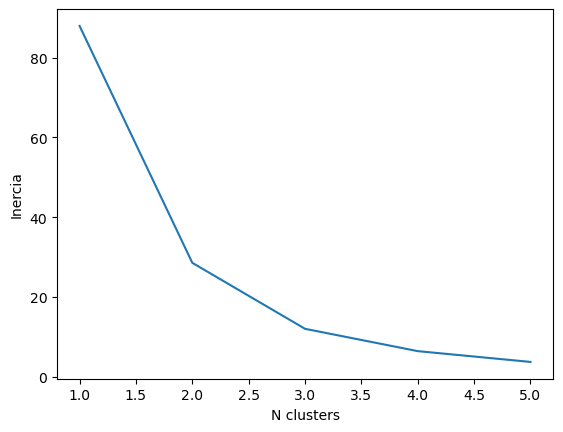

In [27]:
fig=plt.figure()

ax=fig.add_subplot()

ax.plot(n_clusters, inercia)

plt.xlabel('N clusters')
plt.ylabel('Inercia');

In [ ]:
# Vemos por el metodo del codo que el numero optimo de clusters es 3

In [28]:
kmeans=cluster.KMeans(n_clusters=2).fit(normalizados)

c:\Users\matia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\matia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
y_pred=kmeans.predict(normalizados)

y_pred[:10]

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [30]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
len(normalizados), len(y_pred)

(88, 88)

In [32]:
type(normalizados)

numpy.ndarray

In [33]:
nor = pd.DataFrame(normalizados)

In [34]:
nor["cluster"] = y_pred

In [35]:
nor0 = nor[nor["cluster"] == 0]
nor1 = nor[nor["cluster"] == 1]

In [37]:
len(nor0), len(nor1)

(73, 15)

In [38]:
# Agarro una muestra de cada grupo para poder hacer el scatter
# Una muestra uniforme de cada grupo
muestra_nor0 = nor0.sample(n =len(nor1),random_state=42)
muestra_nor1 = nor1.sample(n =len(nor1),random_state=42)


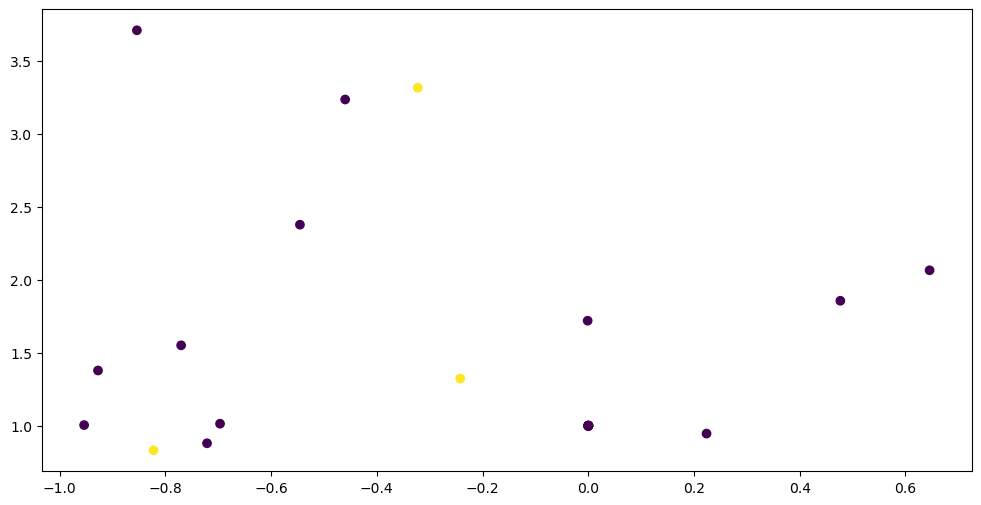

In [42]:
plt.figure(figsize=(12, 6))
plt.scatter(muestra_nor0, muestra_nor1, c=y_pred[:30])
plt.show()

# Exporto a CSV

In [ ]:
pareto_paises.to_csv('../csv/csv_limpios/pareto_paises.csv', index=False)
pareto_valor.to_csv('../csv/csv_limpios/pareto_valor.csv', index=False)